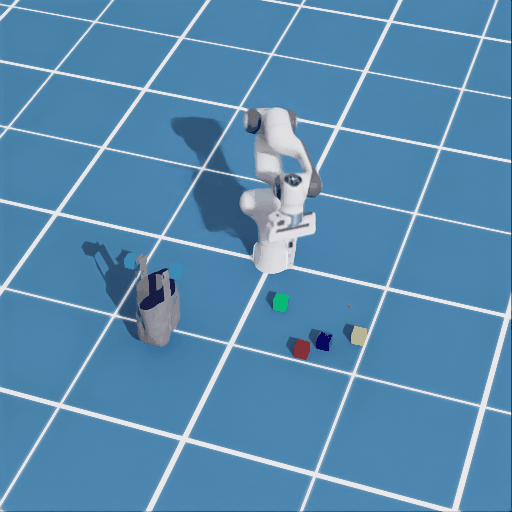

In [3]:
import numpy as np
from PIL import Image as PILImage
from IPython.display import Image, display

data = np.load('/media/irobotics/Transcend/isaacsim_data/v5/episode_2.npy', allow_pickle=True)
actions = [frame['action'] for frame in data]
images = [frame['image'] for frame in data]

frames = [PILImage.fromarray(image) for image in images]

gif_path = 'output.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], loop=0, duration=100)

# print("Actions:", actions)

display(Image(filename=gif_path))

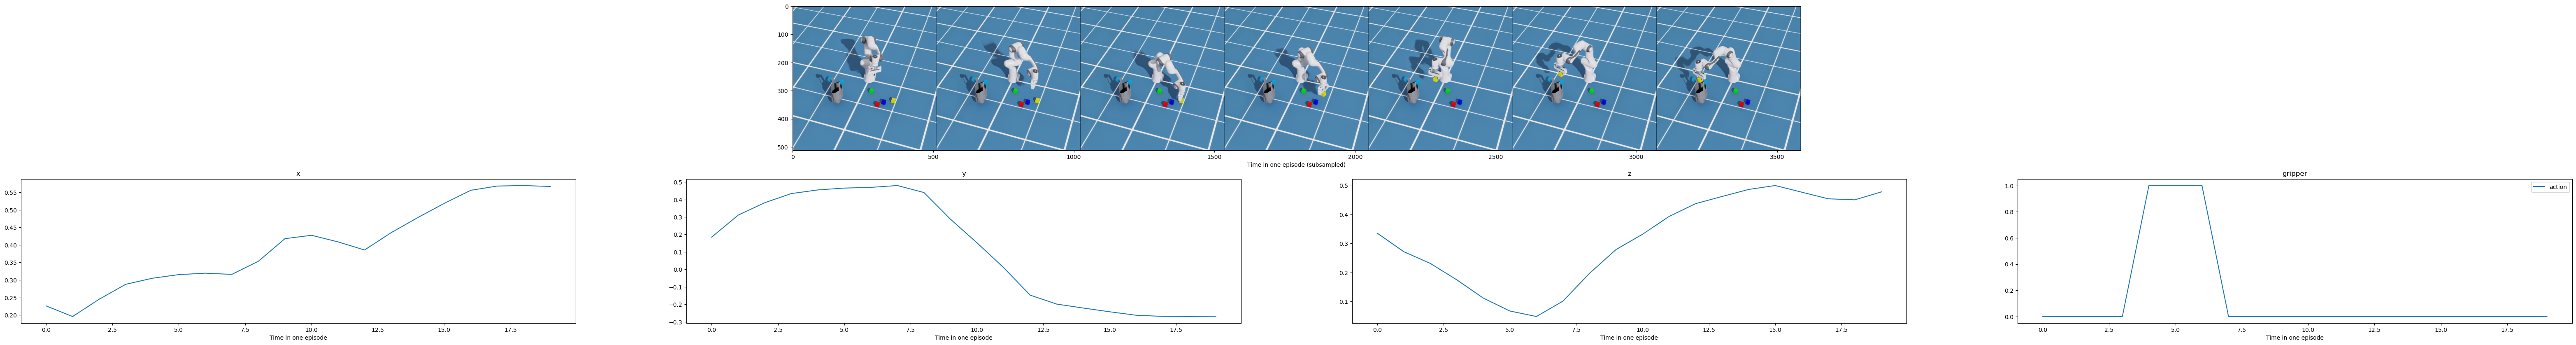

In [4]:
import matplotlib.pyplot as plt

# ACTION_DIM_LABELS = ['x', 'y', 'z', 'yaw', 'pitch', 'roll', 'grasp', "aa", "bb"]
ACTION_DIM_LABELS = ['x', 'y', 'z', 'gripper']

# build image strip to show above actions
img_strip = np.concatenate(np.array(images[::3]), axis=1)

# set up plt figure
figure_layout = [
    ['image'] * len(ACTION_DIM_LABELS),
    ACTION_DIM_LABELS
    # [label] for label in ACTION_DIM_LABELS
]
# plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplot_mosaic(figure_layout)
fig.set_size_inches([80, 10])

# plot actions
pred_actions = np.array(actions).squeeze()
for action_dim, action_label in enumerate(ACTION_DIM_LABELS):
  # actions have batch, horizon, action_dim shape
  axs[action_label].plot(pred_actions[:, action_dim], label='action')
  axs[action_label].set_title(action_label)
  axs[action_label].set_xlabel('Time in one episode')

axs['image'].imshow(img_strip)
axs['image'].set_xlabel('Time in one episode (subsampled)')
plt.legend()

In [5]:
import numpy as np
np.save('/home/irobotics/actions.npy', pred_actions)

In [6]:
pred_actions.shape

(20, 4)

In [7]:
path = "/media/irobotics/Transcend/inference_result/v4_pred_actions.npy"
v4_pred_actions = np.load(path)
v4_pred_actions.shape

(439, 4)